In [15]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
# load the cleaned data

NBA = pd.read_csv('NBA.csv')
NBA

,Season,Row ID,Team,Wins,1 TS,1% TS,1% SC,2 TS,2% TS,2% SC,...,7% SC,8 TS,8% TS,8% SC,9 TS,9% TS,9% SC,10 TS,10% TS,10% SC
0,2016-17,0,Utah Jazz,0.621951,16073140.0,19.942308,17.073112,27123140.0,33.652293,28.810575,...,71.399844,69651289.0,86.417929,73.984565,71991889.0,89.321964,76.470783,74241889.0,92.113590,78.860764
1,2016-17,1,Denver Nuggets,0.487805,15050000.0,18.226077,15.986319,27128652.0,32.853747,28.816430,...,63.172711,62972685.0,76.262125,66.890459,66214485.0,80.188058,70.333944,69425325.0,84.076498,73.744543
2,2016-17,2,Portland Trailblazers,0.500000,24328425.0,21.746512,25.841990,42828425.0,38.283155,45.492947,...,98.260180,99171748.0,88.646906,105.341606,102391327.0,91.524800,108.761487,105142687.0,93.984165,111.684020
3,2016-17,3,Minnesota Timberwolves,0.378049,13550000.0,16.601043,14.392998,25650000.0,31.425590,27.245786,...,60.729018,61044639.0,74.790012,64.842462,64844639.0,79.445655,68.878875,68344639.0,83.733747,72.596623
4,2016-17,4,Oklahoma City Thunder,0.573171,26540100.0,29.056399,28.191262,43685938.0,47.827855,46.403809,...,78.360751,76911679.0,84.203768,81.696652,79469224.0,87.003797,84.413312,81952264.0,89.722257,87.050831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-21,25,Philadelphia 76ers,0.680556,33517241.0,23.160351,35.602478,63059251.0,43.573824,66.982411,...,138.178101,132796290.0,91.761987,141.058061,135361043.0,93.534227,143.782377,137839883.0,95.247101,146.415435
146,2020-21,26,Brooklyn Nets,0.666667,41254920.0,24.808721,37.800000,81363870.0,48.928310,74.550000,...,142.285256,157380168.0,94.640848,144.200264,159204171.0,95.737715,145.871515,160868032.0,96.738281,147.396034
147,2020-21,27,New York Knicks,0.430556,18900000.0,20.263557,17.317207,27131760.0,29.089205,24.859593,...,53.530265,63284971.0,67.850721,57.985130,64284971.0,68.922867,58.901384,68873651.0,73.842601,63.105782
148,2020-21,28,Toronto Raptors,0.375000,30559200.0,23.905854,28.000000,61059200.0,47.765397,55.945758,...,100.656634,113728865.0,88.967828,104.204568,117533015.0,91.943739,107.690137,119791015.0,93.710128,109.759039


In [18]:
# create the dependent variable, this wins column because we are trying to predict win totals
NBA_y = NBA['Wins']

In [19]:
# create the independent variable by removing the dependent variable and other description features

NBA_X = NBA.drop(columns=['Team', 'Wins','Season','Row ID'])

In [20]:
# split into a training and testing data sets.
# being sure to keep the test set away from the training data to not influence model development

X_train, X_test, y_train, y_test = train_test_split(NBA_X, NBA_y, test_size=0.2, random_state=15)

In [24]:
#standardize the data so they are all in the same format

#assign the standard scaler to a variable
scaler = preprocessing.StandardScaler()

#fit the scaler ON ONLY THE TRAINING SET
scaler.fit(X_train)

# process both the independent and dependent data through the standard scaler
# assigning them to new variables
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#first model selection is ridge. Ridge should work better than linearReg and Lasso due 
#to the colinearity of features

# I am using ridge cv so the alpha is optimized on it's own

#standardized
ridge_std = linear_model.RidgeCV()
model_ridge_std = ridge_std.fit(X_train_scaled, y_train)
ridge_coef = ridge_std.fit(X_train_scaled, y_train).coef_

#NOT standardized
ridge = linear_model.RidgeCV()
model_ridge = ridge.fit(X_train, y_train)
print('std : ', model_ridge_std.alpha_, 'not std : ',model_ridge.alpha_)

std :  0.1 not std :  1.0


As alpha increases model complexity reduces.

In [26]:
# comparing models
# .score provides the R squared. best result would be 1.0
model_ridge_std.score(X_train_scaled, y_train), model_ridge.score(X_train, y_train)

(0.40971238841569213, -100.04128435970249)

In [27]:
#the standardized model was WOW-ZERS BETTER, still not great

In [28]:
#continuing with just standardized

y_predRIDGE = model_ridge_std.predict(X_test_scaled)
win_predict_ridge = y_predRIDGE-y_test

In [29]:
# this it the difference in win percent prediction and real wins for those teams
# taking the absolute value because the amount of error is directionless
win_predict_ridge = abs(win_predict_ridge)

win_predict_ridge

win_predict_ridge.describe()

count    30.000000
mean      0.091774
std       0.070588
min       0.002999
25%       0.047668
50%       0.071564
75%       0.137575
max       0.250479
Name: Wins, dtype: float64

In [32]:
# trying a different type of scaling

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_mms = min_max_scaler.transform(X_train)
X_test_mms = min_max_scaler.transform(X_test)

In [33]:
#min max std
mms_ridge = linear_model.RidgeCV()
mms_ridge_model = mms_ridge.fit(X_train_mms, y_train)

#NOT standardized is the same so do nothing new

print('min max std : ', mms_ridge_model.alpha_)

min max std :  0.1


In [34]:
#comparing models
model_ridge_std.score(X_train_scaled, y_train), mms_ridge_model.score(X_train_mms, y_train)

(0.40971238841569213, 0.3368239173740363)

In [35]:
#lets try power transformer
power = preprocessing.PowerTransformer(method='box-cox')
power.fit(X_train)
X_train_power = power.transform(X_train)
X_test_power = power.transform(X_test)

In [36]:
#power
ridge_power = linear_model.RidgeCV()
model_ridge_power = ridge_power.fit(X_train_power, y_train)

In [37]:
#comparing standardizer
model_ridge_power.score(X_train_power, y_train)

0.3111808547718258

In [38]:
#the standardscaler did better than the min max scaler and the power transformer

In [39]:
#let's test lasso
names = NBA.drop(['Team', 'Wins','Season','Row ID'], axis=1).columns
lasso = linear_model.LassoCV(max_iter=200000)
model_lasso = lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.fit(X_train_scaled, y_train).coef_
model_lasso.score(X_train_scaled, y_train)

0.25389945197408603

In [40]:
model_lasso.alpha_

0.009959047821398805

In [41]:
#like expected lasso was worse

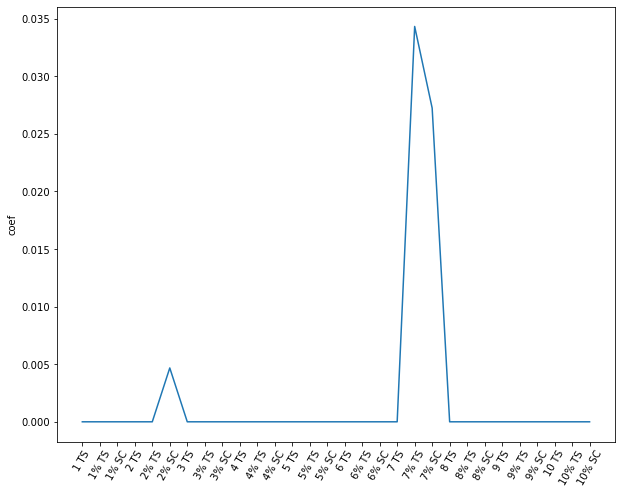

In [43]:
# what features is lasso prioritizing

_ = plt.figure(figsize=(10, 8))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
plt.savefig('NBA lasso.png')
plt.show()

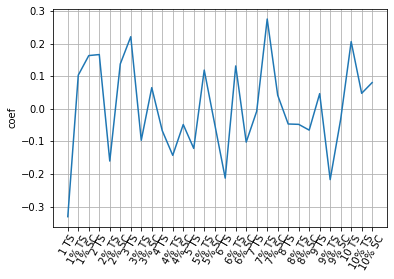

In [44]:
# what features does ridge like
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('coef')
_ = plt.grid()
plt.savefig('NBA ridge.png')
plt.show()

In [45]:
# testing linear regression.

lr = linear_model.LinearRegression()

In [46]:
# again fit to standard scaler

lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

0.5201432823399867

In [47]:
# r2 for linear is better, however r2 isnt the whole story

In [48]:
# generating linear regression predictions
LR_y_pred = lr.predict(X_test_scaled)

# difference between predictions and reality
linear_pred = LR_y_pred-y_test

# checking results
LR_win_abs = abs(linear_pred)
LR_win_abs.describe()

count    30.000000
mean      0.101100
std       0.066832
min       0.001786
25%       0.058680
50%       0.084225
75%       0.150300
max       0.245342
Name: Wins, dtype: float64

In [49]:
lr.coef_

array([ -1.78604511,   0.07090616,   1.54607753,   0.26945415,
        -0.59423035,   0.5707529 ,   6.32305045,   0.72745486,
        -6.70854341,  -7.91303273,  -1.20387607,   8.9553451 ,
         6.66340402,   0.88178073,  -7.76715918, -10.13975175,
         0.6670328 ,   7.95607058,  10.09639181,  -0.56644508,
        -7.08262499,  -5.4241858 ,   1.05024492,   1.30892382,
        -2.37405527,  -2.142063  ,   8.3245718 ,   4.06596755,
         1.03262594,  -6.78012384])

In [50]:
LR_y_pred

array([0.52631807, 0.53475741, 0.51667728, 0.50412829, 0.5657766 ,
       0.47649314, 0.53921253, 0.39915211, 0.54249176, 0.41990112,
       0.62442579, 0.51356925, 0.58569071, 0.52846807, 0.5193004 ,
       0.28304086, 0.36014721, 0.39217341, 0.34752123, 0.36187533,
       0.58715181, 0.58384265, 0.43716972, 0.41000228, 0.67133323,
       0.34452707, 0.47364894, 0.62034152, 0.51982675, 0.57491819])

In [51]:
mean_squared_error(y_test, LR_y_pred)

0.014538732733911519